<a href="https://colab.research.google.com/github/zeel2910/position-app/blob/main/CHAVDA_GEOM2159_FinalProject_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Name: - Zeel K. Chavda**
#### **Student Number: - s4075024**
#### **Course Code: - GEOM 2159**

# **Final Project: Investigating the relationship between Crime and socioeconimic factors**

This project investigates the relationships between population size, housing prices, crime rates, and population density across Local Government Areas (LGAs) in Victoria, Australia, for the years 2014–2021.

The goal is to explore the following research hypothesis:

- **Q2:** Mean house prices are positively correlated with population size, with higher prices observed in more densely populated areas.
- **Q3:** Areas with higher population density (people per square kilometre) tend to experience a greater number of crimes
- **Q4:** Crime rates (crimes per 100,000 population) are generally higher in areas with lower mean house prices.

By loading, cleaning, merging, and analyzing four datasets (crime, house prices, population, and suburb area), we compute key derived metrics and visualize relationships using scatterplots and correlation coefficients.


## Pseudocode

1. **Load** datasets: house prices, population, crime, and area
2. **Clean** column names and standardize Local Government Area (LGA) labels
3. **Reshape** house prices, population, and area tables from wide to long format
4. **Filter** the data to only include years 2014–2021
5. **Merge** all datasets on common columns (Year, LGA)
6. **Compute** derived metrics:
   - Crime per capita = incidents / population
   - Population density = population / area
7. **Analyze Questions:**
   - Q2: Population vs. House Price (Pearson correlation + plot)
   - Q3: Population Density vs. Crime Incidents (Pearson correlation + plot)
   - Q4: House Price vs. Crime Rate per 100,000 people (Pearson correlation + plot)
8. **Interpret** the findings using the Pearson r and p-values


## Workflow Diagram

The following is a structured workflow used to investigate the relationship between housing prices, population, and crime rates in Victoria:

1. **Load Datasets**
   - Mean House Prices (Excel)
   - Crime Rates (Excel)
   - Population Data (Excel)
   - Suburb Shapefile (GeoJSON/Shapefile)

2. **Clean & Standardize Data**
   - Rename columns, filter relevant years
   - Fix LGA name mismatches
   - Drop missing or inconsistent records

3. **Reshape Data**
   - Convert wide-format data to long-format (using `melt`)
   - Align years and LGAs across datasets

4. **Merge Datasets**
   - Join house price, crime, and population data
   - Calculate population density: `Population / Area`

5. **Statistical Analysis**
   - Q2: House Price vs. Population  
   - Q3: Population Density vs. Crime  
   - Q4: House Price vs. Crime Rate  
   - For each: compute Pearson correlation (r, p-value) and visualize with scatter plots

6. **Spatial Visualization**
   - Merge dataset with suburb shapefile
   - Create choropleth maps for:
     - Mean House Price
     - Population Density
     - Crime Rate

7. **Interpretation & Conclusion**
   - Describe correlation results and trends
   - Acknowledge limitations
   - Clarify that correlation ≠ causation


In [17]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate Pearson correlation coefficient and p-value
from scipy.stats import pearsonr


In [18]:
# Load Excel files (update paths if needed)
house_df = pd.read_excel("MeanHousePricesClean.xlsx")
crime_df = pd.read_excel("CrimeClean.xlsx")
pop_df = pd.read_excel("PopulationClean.xlsx")
area_df = pd.read_excel("SuburbAreas.xlsx")

In [19]:
# Strip whitespace from column names
house_df.columns = house_df.columns.str.strip()
pop_df.columns = pop_df.columns.str.strip()
area_df.columns = area_df.columns.str.strip()

In [20]:
# Reshape house prices and population to long format
# Reshape data from wide to long format
house_long = house_df.melt(id_vars=["Year"], var_name="LGA", value_name="HousePrice")
pop_long = pop_df.melt(id_vars=["Year"], var_name="LGA", value_name="Population")
area_long = area_df.melt(id_vars=["Property"], var_name="LGA", value_name="Area_km2").drop(columns=["Property"])

In [21]:
# Strip all column names first
crime_df.columns = crime_df.columns.str.strip()

# Print to confirm correct name
# Print output to check intermediate results
print(crime_df.columns.tolist())

# Then rename correctly based on the actual name you see
# Rename columns for consistency
crime_df = crime_df.rename(columns={
    "Local Government Area": "LGA",  # match this exactly after printing
    "Incidents recorded": "Incidents",
    "Crime rate per 100,000 population": "CrimeRatePer100k"
})


['Year', 'Local Government Area', 'Incidents recorded', 'Crime rate per 100,000 population']


In [22]:
valid_years = list(range(2014, 2022))

house_long = house_long[house_long["Year"].isin(valid_years)]
pop_long = pop_long[pop_long["Year"].isin(valid_years)]
crime_df = crime_df[crime_df["Year"].isin(valid_years)]


In [23]:
# Map to align LGA names in house prices
house_lga_map = {
    "Greater Bendigo City": "Greater Bendigo",
    "Greater Dandenong City": "Greater Dandenong",
    "Greater Geelong City": "Greater Geelong",
    "Greater Shepparton City": "Greater Shepparton",
    "Moreland City": "Moreland",
    # add all others as needed...
}

house_long = house_long.copy()
house_long["LGA"] = house_long["LGA"].replace(house_lga_map)


In [24]:
# Merge dataframes on common columns (e.g., LGA and year)
merged = pd.merge(house_long, pop_long, on=["Year", "LGA"], how="inner")
merged = pd.merge(merged, crime_df, on=["Year", "LGA"], how="inner")
merged = pd.merge(merged, area_long, on="LGA", how="left")

# Add derived fields
# Merge dataframes on common columns (e.g., LGA and year)
merged["CrimePerCapita"] = merged["Incidents"] / merged["Population"]
merged["PopulationDensity"] = merged["Population"] / merged["Area_km2"]


In [25]:
# Print output to check intermediate results
print("HousePrice LGAs:")
print(sorted(house_long["LGA"].unique()))

print("\nPopulation LGAs:")
print(sorted(pop_long["LGA"].unique()))

print("\nCrime LGAs:")
print(sorted(crime_df["LGA"].unique()))

print("\nArea LGAs:")
print(sorted(area_long["LGA"].unique()))


HousePrice LGAs:
['Alpine Shire', 'Ararat Rural City', 'Ballarat City', 'Banyule City', 'Bass Coast Shire', 'Baw Baw Shire', 'Bayside City', 'Benalla Rural City', 'Boroondara City', 'Borough of Queenscliffe', 'Brimbank City', 'Buloke Shire', 'Campaspe Shire', 'Cardina Shire', 'Casey City', 'Central Goldfields Shire', 'Colac Otway Shire', 'Corangamite Shire', 'Darebin City', 'East Gippsland Shire', 'Frankston City', 'Gannawarra Shire', 'Glen Eira City', 'Glenelg Shire', 'Golden Plains Shire', 'Greater Bendigo', 'Greater Dandenong', 'Greater Geelong', 'Greater Shepparton', 'Hepburn Shire', 'Hindmarsh Shire', 'Hobsons Bay City', 'Horsham Rural City', 'Hume City', 'Indigo Shire', 'Kingston City', 'Knox City', 'Latrobe City', 'Loddon Shire', 'Macedon Ranges Shire', 'Manningham City', 'Mansfield Shire', 'Maribyrnong City', 'Maroondah City', 'Melbourne City', 'Melton City', 'Mildura Rural City', 'Mitchell Shire', 'Moira Shire', 'Monash City', 'Moonee Valley City', 'Moorabool Shire', 'Moreland

In [26]:
import re

# HousePrice: remove suffixes
house_long["LGA"] = house_long["LGA"].str.replace(r" City| Shire| Rural City| Borough of ", "", regex=True).str.strip()

# Population & Area: just strip whitespace
pop_long["LGA"] = pop_long["LGA"].str.strip()
area_long["LGA"] = area_long["LGA"].str.strip()

# Crime: strip & fix Colac-Otway formatting
crime_df["LGA"] = crime_df["LGA"].str.strip()
crime_df["LGA"] = crime_df["LGA"].str.replace("-", " ")
crime_df["LGA"] = crime_df["LGA"].str.replace(r" City| Shire| Rural City| Borough of ", "", regex=True).str.strip()


In [27]:
# Merge dataframes on common columns (e.g., LGA and year)
merged = pd.merge(house_long, pop_long, on=["Year", "LGA"], how="inner")
merged = pd.merge(merged, crime_df, on=["Year", "LGA"], how="inner")
merged = pd.merge(merged, area_long, on="LGA", how="left")

merged["CrimePerCapita"] = merged["Incidents"] / merged["Population"]
merged["PopulationDensity"] = merged["Population"] / merged["Area_km2"]

print("Final merged dataset shape:", merged.shape)
merged.head()


Final merged dataset shape: (608, 9)


,Year,LGA,HousePrice,Population,Incidents,CrimeRatePer100k,Area_km2,CrimePerCapita,PopulationDensity
0,2014,Alpine,294889,12355,278,2250.1,4788.2,0.022501,2.580302
1,2015,Alpine,315481,12429,357,2872.3,4788.2,0.028723,2.595756
2,2016,Alpine,351412,12578,267,2122.8,4788.2,0.021228,2.626874
3,2017,Alpine,374240,12679,310,2445.0,4788.2,0.024450,2.647968
4,2018,Alpine,408328,12807,393,3068.6,4788.2,0.030686,2.674700


## Q2 Interpretation: Population vs. House Price

- **Pearson r = 0.47**, **p = 6.32e-35**
- This indicates a **moderate positive correlation** between population size and mean house price.
- The result is **statistically significant** (p < 0.05), meaning there is strong evidence that more populous LGAs tend to have higher average house prices.
- However, the spread of data points suggests variability — not all high-population LGAs have expensive houses, but the trend holds in general.
- The choropleth map supports the statistical analysis by showing that LGAs in and around Melbourne — which are generally more densely populated — have notably higher mean house prices. This spatial pattern visually reinforces the moderate positive correlation found in the scatter plot.

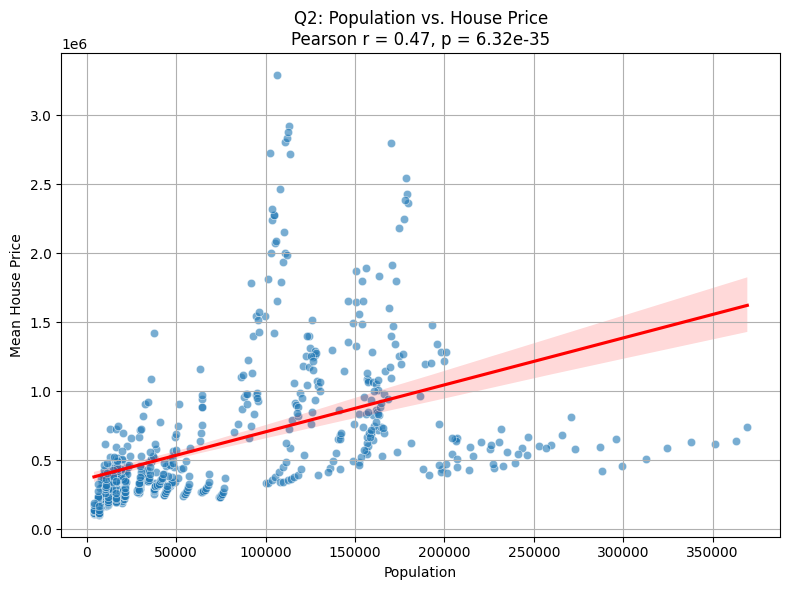

Pearson r = 0.471, p-value = 6.322e-35


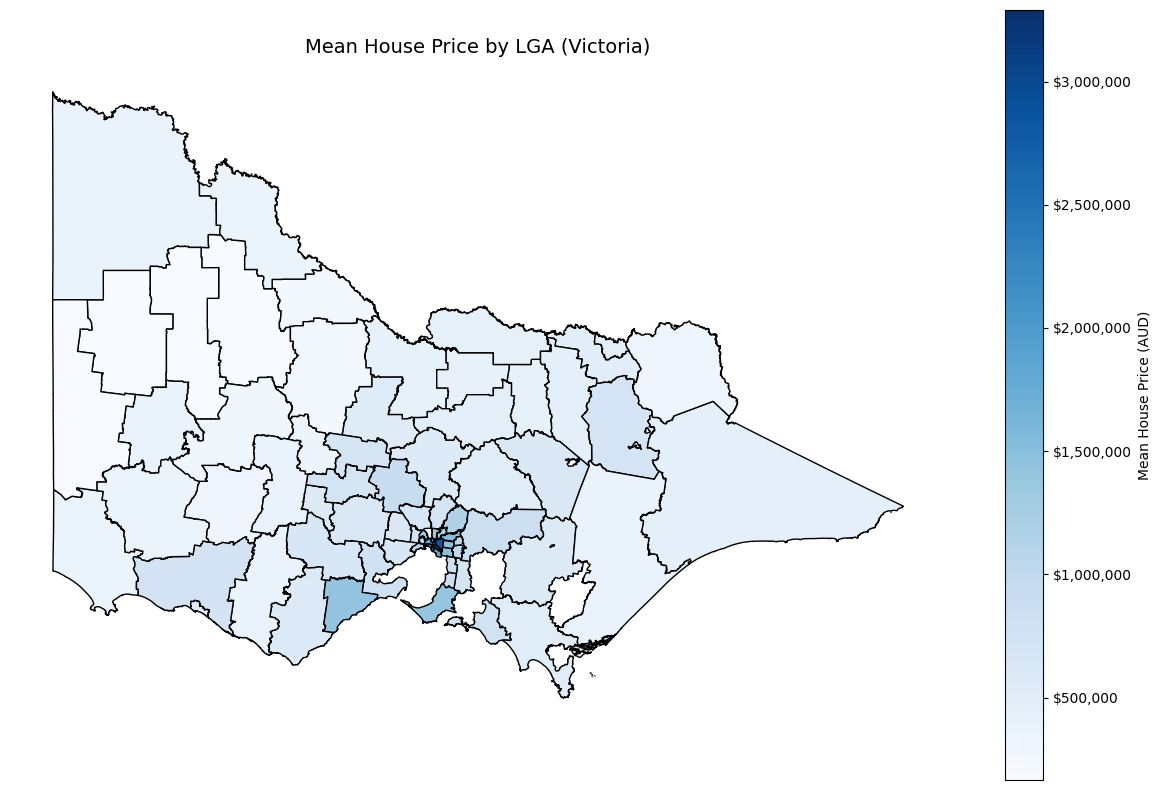

In [28]:
# Q2: Population vs. House Price
q2_data = merged[
    (merged["Population"] > 0) &
    (merged["HousePrice"] > 0)
].dropna(subset=["Population", "HousePrice"])

# Pearson correlation
# Calculate Pearson correlation coefficient and p-value
r_q2, p_q2 = pearsonr(q2_data["Population"], q2_data["HousePrice"])

# Plot
plt.figure(figsize=(8, 6))
# Create a scatterplot to visualize correlation between variables
sns.scatterplot(data=q2_data, x="Population", y="HousePrice", alpha=0.6)
sns.regplot(data=q2_data, x="Population", y="HousePrice", scatter=False, color="red")
# Set the title for the plot
plt.title(f"Q2: Population vs. House Price\nPearson r = {r_q2:.2f}, p = {p_q2:.3g}")
plt.xlabel("Population")
plt.ylabel("Mean House Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print correlation results
print(f"Pearson r = {r_q2:.3f}, p-value = {p_q2:.4g}")

# Chloropleth map code
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# STEP 1: Load shapefile
shapefile_path = "LGA_2021_AUST_GDA2020.shp"
gdf = gpd.read_file(shapefile_path)

# STEP 2: Filter to only Victoria LGAs
# Create a copy of the DataFrame to avoid modifying original data
vic_gdf = gdf[gdf["STE_NAME21"] == "Victoria"].copy()

# STEP 3: Prepare the latest summary stats (2021)
# Aggregate data by LGA and year
latest_summary = merged[merged["Year"] == 2021].groupby("LGA", as_index=False).agg({
    "HousePrice": "mean",
    "CrimeRatePer100k": "mean",
    "PopulationDensity": "mean"
})

# STEP 4: Merge shapefile with statistical data
map_data = vic_gdf.merge(latest_summary, left_on="LGA_NAME21", right_on="LGA", how="left")

# STEP 5: Plot – Mean House Price Choropleth
fig2, ax2 = plt.subplots(figsize=(12, 8))
map_data.plot(column="HousePrice", cmap="Blues", legend=True, edgecolor="black", ax=ax2)
ax2.set_title("Mean House Price by LGA (Victoria)", fontsize=14)
ax2.axis("off")
colorbar2 = fig2.get_axes()[1]
colorbar2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${int(x):,}"))
colorbar2.set_ylabel("Mean House Price (AUD)", fontsize=10)
plt.tight_layout()
plt.show()

## Q3 Interpretation: Population Density vs. Crime Incidents

- **Pearson r = 0.54**, **p = 1.19e-47**
- This shows a **moderate to strong positive correlation** between population density and the number of recorded crimes.
- The result is **highly statistically significant**, suggesting that LGAs with more people per square kilometer tend to have more crime incidents.
- This supports the hypothesis that denser areas may experience more frequent criminal activity due to increased interactions and stress on infrastructure.
- It is important to note that this analysis reflects statistical correlation and does not imply causation. While higher population density is associated with higher crime levels, this does not confirm that one causes the other.
- The population density choropleth map highlights that LGAs within metropolitan Melbourne have significantly higher density values than regional areas. This spatial pattern aligns with the scatterplot trend, supporting the observed correlation between population density and crime incidents. Denser regions appear darker and may be subject to more complex socio-economic dynamics contributing to higher recorded crime levels.


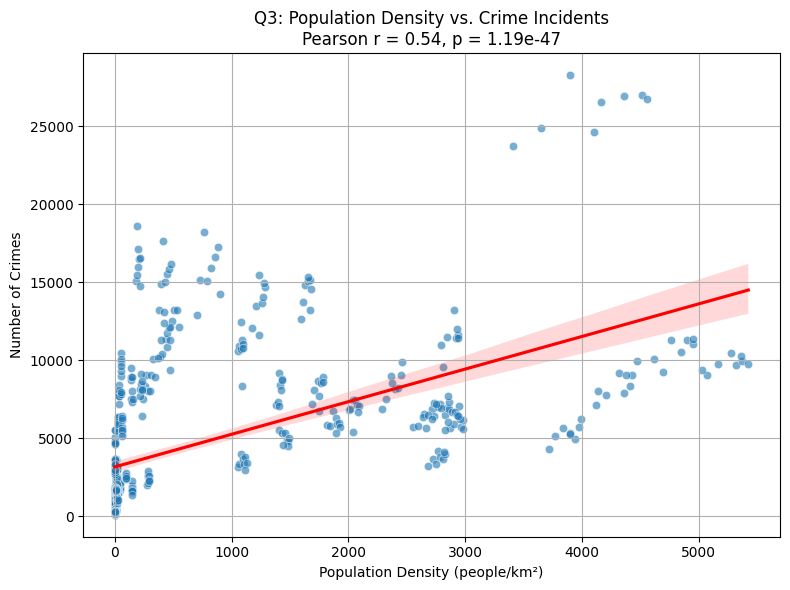

Pearson r = 0.542, p-value = 1.193e-47


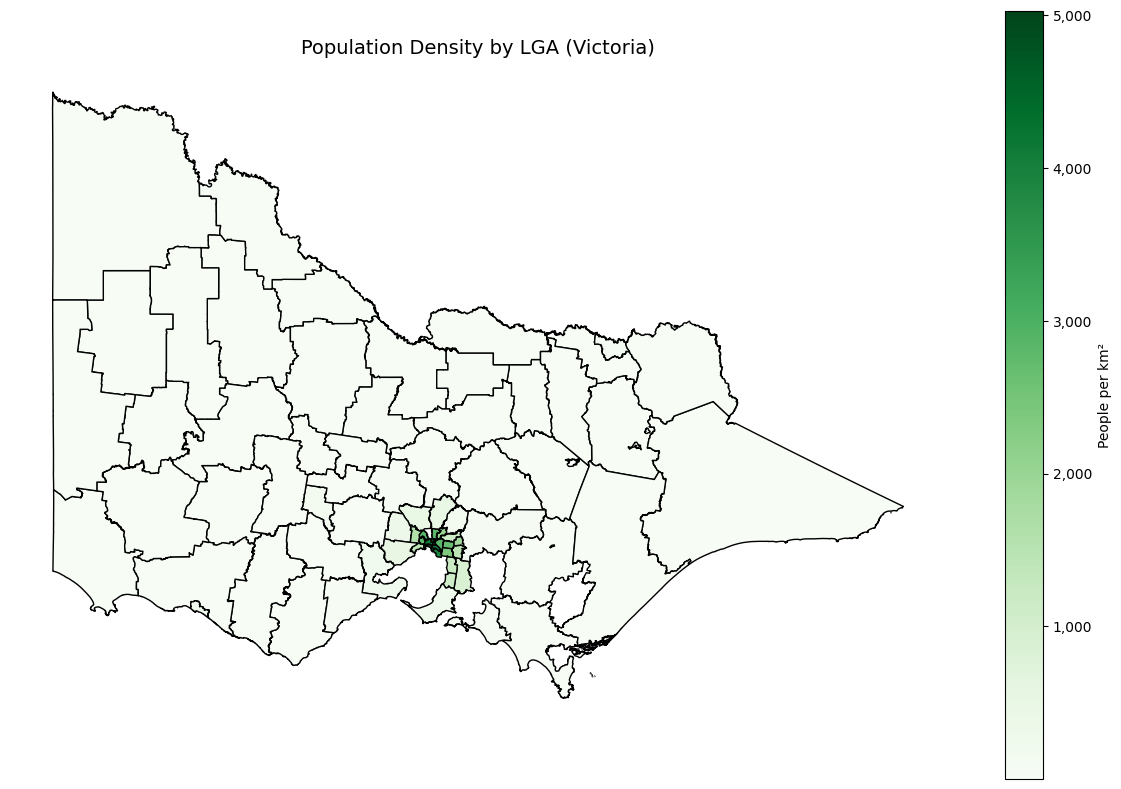

In [29]:
# Q3: Population Density vs. Crime Incidents

# STEP 1: Filter valid rows
q3_data = merged[
    (merged["PopulationDensity"] > 0) &
    (merged["Incidents"] > 0)
].dropna(subset=["PopulationDensity", "Incidents"])

# STEP 2: Calculate Pearson correlation
r_q3, p_q3 = pearsonr(q3_data["PopulationDensity"], q3_data["Incidents"])

# STEP 3: Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=q3_data, x="PopulationDensity", y="Incidents", alpha=0.6)
sns.regplot(data=q3_data, x="PopulationDensity", y="Incidents", scatter=False, color="red")
plt.title(f"Q3: Population Density vs. Crime Incidents\nPearson r = {r_q3:.2f}, p = {p_q3:.3g}")
plt.xlabel("Population Density (people/km²)")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 4: Output values
print(f"Pearson r = {r_q3:.3f}, p-value = {p_q3:.4g}")

# Population Density Choropleth
fig3, ax3 = plt.subplots(figsize=(12, 8))
map_data.plot(column="PopulationDensity", cmap="Greens", legend=True, edgecolor="black", ax=ax3)
ax3.set_title("Population Density by LGA (Victoria)", fontsize=14)
ax3.axis("off")
colorbar3 = fig3.get_axes()[1]
colorbar3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
colorbar3.set_ylabel("People per km²", fontsize=10)
plt.tight_layout()
plt.show()

## Q4 Interpretation: House Price vs. Crime Rate per 100,000

- **Pearson r = 0.11**, **p = 0.008**
- This is a **very weak positive correlation**, but statistically significant (p < 0.05).
- While the data does not support a strong inverse relationship (as hypothesized), it does suggest **a very slight trend** toward higher crime rates in more expensive areas — which may be influenced by factors such as urbanization.
- Therefore, **Q4's hypothesis is not strongly supported** by the data.
- It is important to note that while this trend is statistically significant, it only reflects correlation and does not imply causation. Other urban characteristics may confound the observed relationship.
- The choropleth map of crime rate per 100,000 population shows several regional LGAs, especially in the north-west and east of Victoria, with relatively higher rates. These do not consistently align with areas of high house prices shown earlier, reinforcing the weak correlation observed. Urban LGAs exhibit a mixed pattern, suggesting that other social or economic factors likely influence crime rates more than housing cost alone.


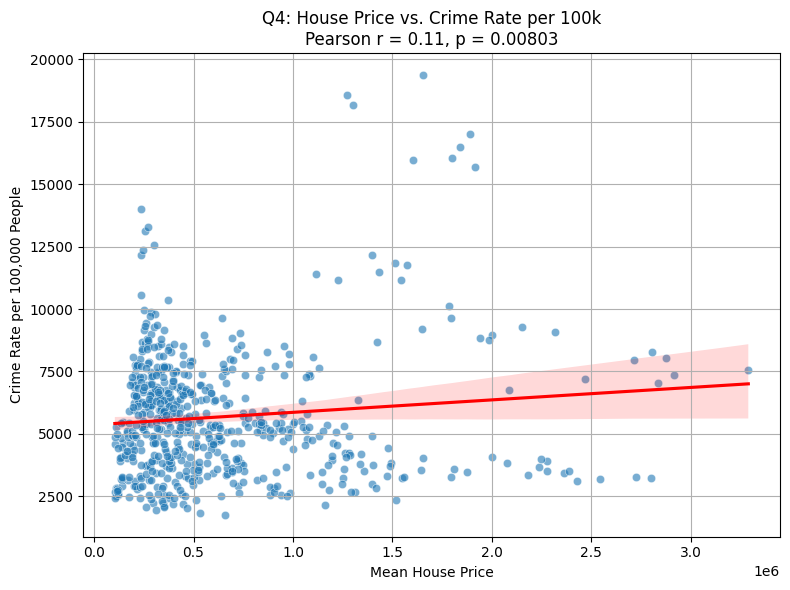

Pearson r = 0.107, p-value = 0.008029


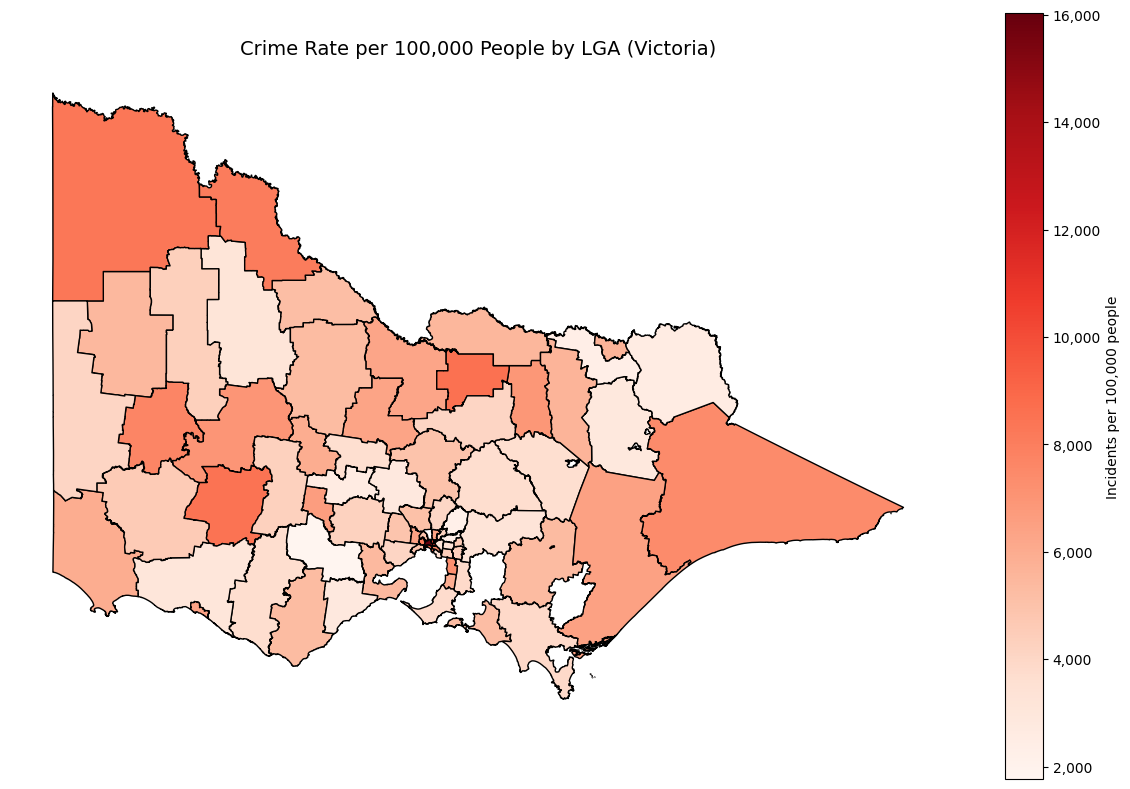

In [30]:
# Q4: House Price vs. Crime Rate per 100,000 people

# STEP 1: Filter valid data
q4_data = merged[
    (merged["HousePrice"] > 0) &
    (merged["CrimeRatePer100k"] > 0)
].dropna(subset=["HousePrice", "CrimeRatePer100k"])

# STEP 2: Pearson correlation
r_q4, p_q4 = pearsonr(q4_data["HousePrice"], q4_data["CrimeRatePer100k"])

# STEP 3: Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=q4_data, x="HousePrice", y="CrimeRatePer100k", alpha=0.6)
sns.regplot(data=q4_data, x="HousePrice", y="CrimeRatePer100k", scatter=False, color="red")
plt.title(f"Q4: House Price vs. Crime Rate per 100k\nPearson r = {r_q4:.2f}, p = {p_q4:.3g}")
plt.xlabel("Mean House Price")
plt.ylabel("Crime Rate per 100,000 People")
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 4: Output values
print(f"Pearson r = {r_q4:.3f}, p-value = {p_q4:.4g}")

# Crime Rate Choropleth
fig1, ax1 = plt.subplots(figsize=(12, 8))
map_data.plot(column="CrimeRatePer100k", cmap="Reds", legend=True, edgecolor="black", ax=ax1)
ax1.set_title("Crime Rate per 100,000 People by LGA (Victoria)", fontsize=14)
ax1.axis("off")
colorbar1 = fig1.get_axes()[1]
colorbar1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
colorbar1.set_ylabel("Incidents per 100,000 people", fontsize=10)
plt.tight_layout()
plt.show()


## Overall Conclusion

- The data analysis supports Q2 and Q3, revealing statistically significant and moderately positive correlations between population size, population density, and outcomes such as house prices and crime incidents.
- Q4, however, shows a very weak positive correlation, which contrasts with the expected inverse relationship between house prices and crime rate. This counter-intuitive trend may be influenced by unaccounted socioeconomic or urban characteristics, warranting further investigation.
- It is important to emphasize that this analysis identifies correlations, not causal relationships. Although associations are evident, the direction or nature of any cause-effect link cannot be determined without further research using causal inference methods.
